In [7]:
%run functions.ipynb

np.set_printoptions(precision=3)
np.random.seed(42)

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['flatten']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
X_train, X_test, y_train, y_test = load_train_and_test_parts()
print("Train and test sizes: {} {}".format(X_train.shape, X_test.shape))
print("(1, 0) labels count in train test: {} {}".format((np.count_nonzero(y_train==1), np.count_nonzero(y_train==0)), 
                                                        (np.count_nonzero(y_test==1), np.count_nonzero(y_test==0))))
standarizer = StandardScaler().fit(X_train)
X_std_train = standarizer.transform(X_train)
X_std_test = standarizer.transform(X_test)

Train and test sizes: (726, 12179) (243, 12179)
(1, 0) labels count in train test: (289, 437) (104, 139)


In [9]:
rlr_params = {'n_estimators' : [50], 'n_variables' : [2000], 'C' : [0.5, 0.75, 1.0]}

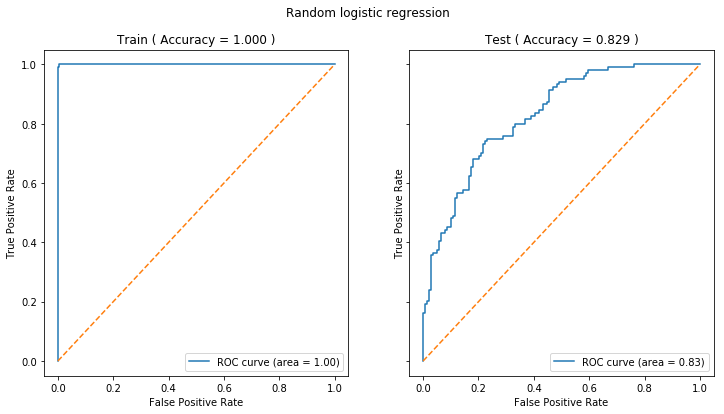

In [10]:
logit_cv = GridSearchCV(RandomLogisticsRegressions(penalty='l1', solver='liblinear'), cv=5, param_grid=rlr_params, scoring='roc_auc')
clf_logit = fit_clf(logit_cv, X_train, y_train, X_test, y_test, title='Random logistic regression')

In [11]:
print(clf_logit.best_estimator_)

RandomLogisticsRegressions(C=1.0, n_estimators=50, n_variables=2000,
              penalty='l1', solver='liblinear', tol=0.0001)


When it was 1000, 2500, 5000 n_variables

In [6]:
print(clf_logit.best_estimator_)

RandomLogisticsRegressions(C=0.5, n_estimators=50, n_variables=2000,
              penalty='l1', solver='liblinear', tol=0.0001)
